In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
salary_train=pd.read_csv('SalaryData_Train(1).csv')
salary_test=pd.read_csv('SalaryData_Test(1).csv')

In [15]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [16]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [17]:
salary_train.columns
salary_test.columns
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [7]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [8]:
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [9]:
col_names=list(salary_train.columns)
train_X=salary_train[col_names[0:13]]
train_Y=salary_train[col_names[13]]
test_x=salary_test[col_names[0:13]]
test_y=salary_test[col_names[13]]

In [10]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
train_pred_gau=Gmodel.fit(train_X,train_Y).predict(train_X)
test_pred_gau=Gmodel.fit(train_X,train_Y).predict(test_x)

In [11]:
train_acc_gau=np.mean(train_pred_gau==train_Y)
test_acc_gau=np.mean(test_pred_gau==test_y)
train_acc_gau#0.795
test_acc_gau#0.794

0.7946879150066402

In [12]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
train_pred_multi=Mmodel.fit(train_X,train_Y).predict(train_X)
test_pred_multi=Mmodel.fit(train_X,train_Y).predict(test_x)

In [13]:
train_acc_multi=np.mean(train_pred_multi==train_Y)
test_acc_multi=np.mean(test_pred_multi==test_y)
train_acc_multi#0.772
test_acc_multi#0.774

0.7749667994687915

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

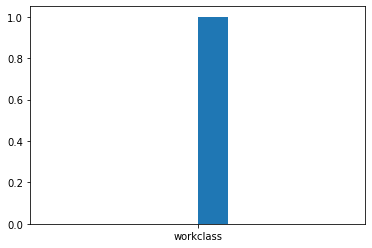

In [14]:
plt.hist('workclass')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

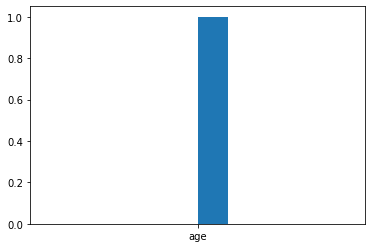

In [18]:
plt.hist('age')

<AxesSubplot:xlabel='age', ylabel='education'>

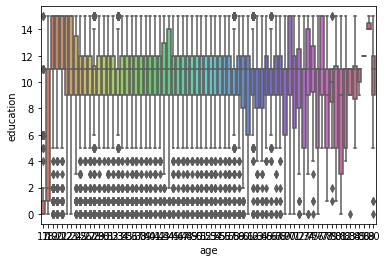

In [20]:
sns.boxplot(x="age",y="education",data=salary_train,palette = "hls")

<AxesSubplot:xlabel='age', ylabel='education'>

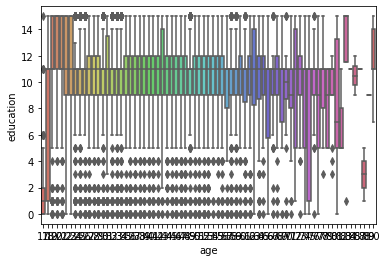

In [21]:
sns.boxplot(x="age",y="education",data=salary_test,palette = "hls")

<AxesSubplot:>

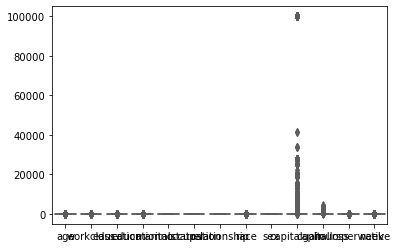

In [23]:
sns.boxplot(data=salary_train,palette = "hls")

<AxesSubplot:>

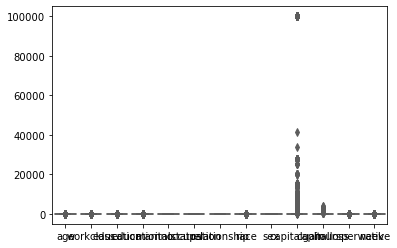

In [24]:
sns.boxplot(data=salary_test,palette = "hls")